In [8]:
import torch
import torch.nn.functional as F
import torchvision.transforms.functional as Fv
import cv2
import matplotlib.pyplot as plt
import plot
import numpy as np
import scipy.ndimage
import skimage

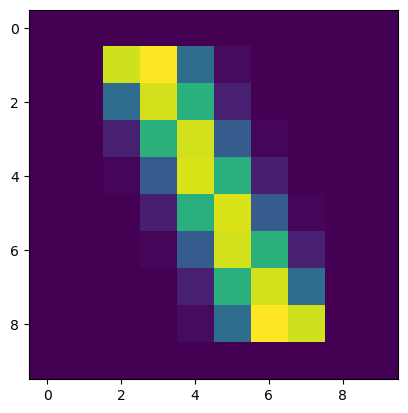

In [6]:
l=8
slope=2
angle = np.arctan(slope)
win = np.eye(l)

if not np.isclose(angle, np.pi / 4):
    win = scipy.ndimage.rotate(
        win, 45 - angle * 180 / np.pi, order=5, prefilter=False
    )
plt.imshow(win)
plt.show()

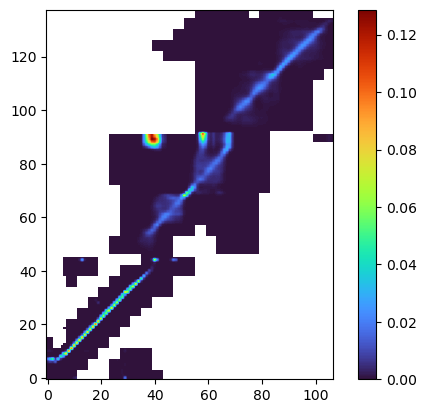

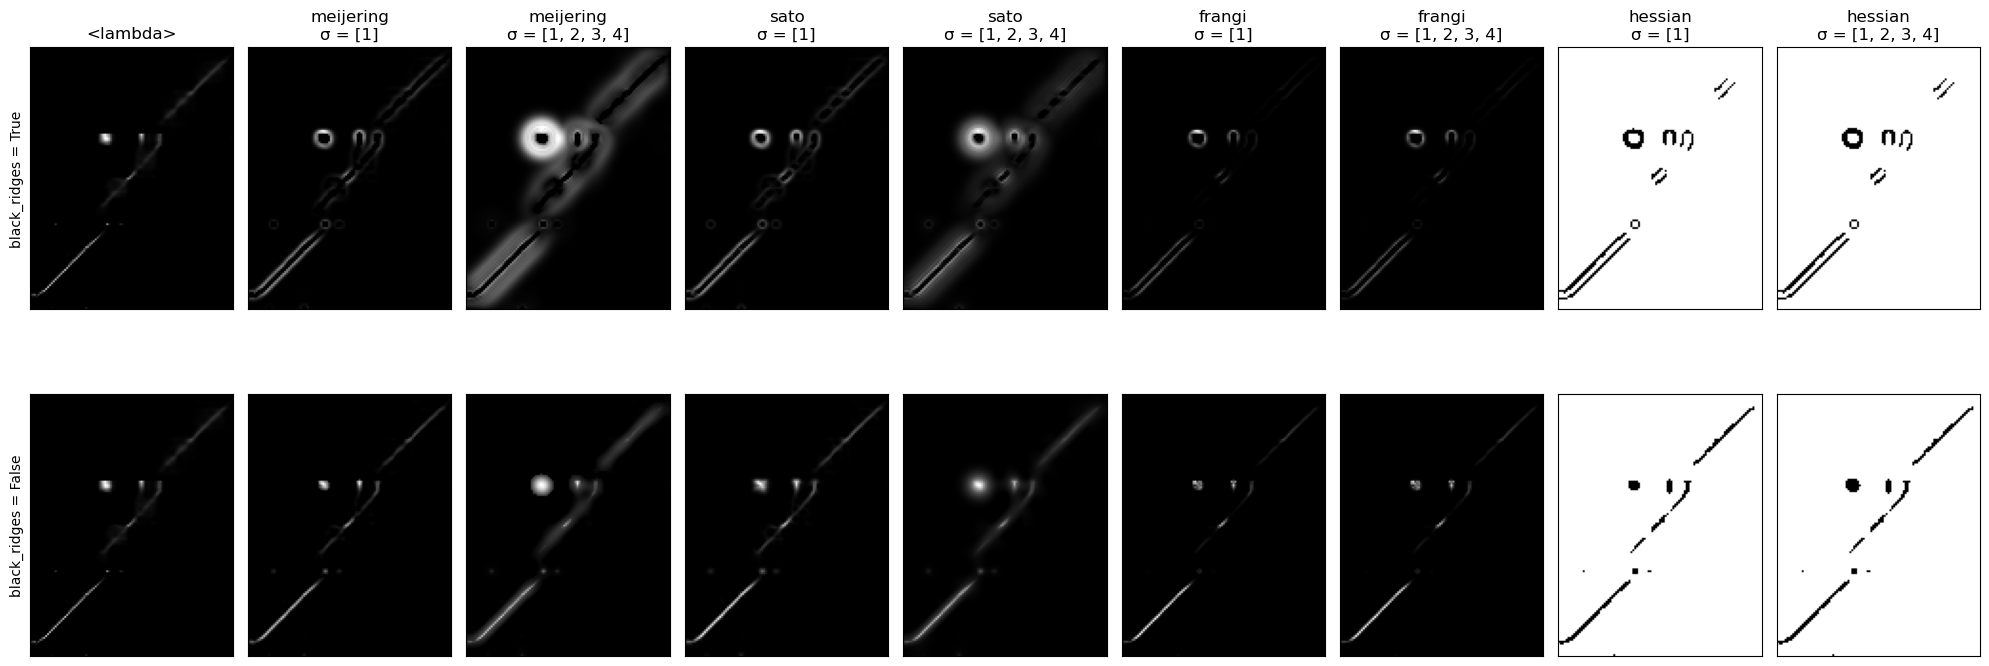

In [13]:
H = torch.load("H_1.00.torch")
dest_shape = 50, 60
threshold = 1e-3
blur_size: int = 3
resize_mode = "area"
H_np = H.detach().numpy()

im=plot.imshow_highlight_zero(H_np, origin="lower", cmap="turbo")
plt.colorbar(im)
plt.show()

axes = plt.figure(figsize=(20, 8)).subplots(2, 9)
for i, black_ridges in enumerate([True, False]):
    for j, (func, sigmas) in enumerate(
        [
            (lambda x, **kwargs: x, None),
            (skimage.filters.meijering, [1]),
            (skimage.filters.meijering, range(1, 5)),
            (skimage.filters.sato, [1]),
            (skimage.filters.sato, range(1, 5)),
            (skimage.filters.frangi, [1]),
            (skimage.filters.frangi, range(1, 5)),
            (skimage.filters.hessian, [1]),
            (skimage.filters.hessian, range(1, 5)),
        ]
    ):
        result = func(H_np, black_ridges=black_ridges, sigmas=sigmas)
        axes[i, j].imshow(result, cmap="gray", origin="lower")
        if i == 0:
            title = func.__name__
            if sigmas:
                title += f"\n\N{GREEK SMALL LETTER SIGMA} = {list(sigmas)}"
            axes[i, j].set_title(title)
        if j == 0:
            axes[i, j].set_ylabel(f'{black_ridges = }')
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


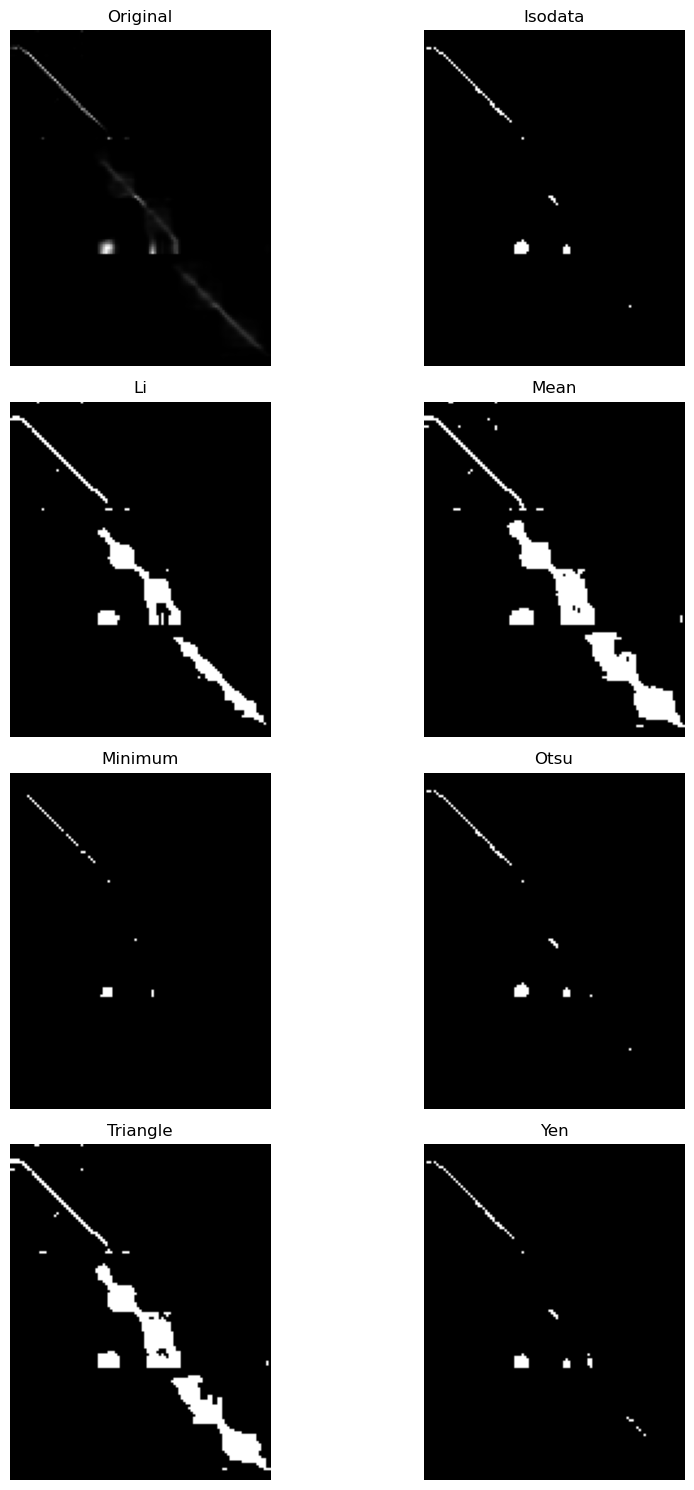

In [17]:
fig, ax = skimage.filters.try_all_threshold(H_np, figsize=(10, 15), verbose=True)

plt.show()